In [1]:
import sys
sys.path.append('..')

from data_parsers import databento_file_parser
from executor import SimpleExecutor1

import pandas as pd
import math

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 80)

In [18]:
ticker = 'NVDA'
date = '20230510'

data_file_path = f'../data/databento/{ticker}/xnas-itch-{date}.mbp-10.dbn.zst'
data_df = databento_file_parser(data_file_path)
data_df = list(data_df.resample('30min'))[0][1]
data_df

,ts_event,action,side,depth,price,size,flags,bid_px_00,ask_px_00,bid_sz_00,ask_sz_00,bid_px_01,ask_px_01,bid_sz_01,ask_sz_01,bid_px_02,ask_px_02,bid_sz_02,ask_sz_02,bid_px_03,ask_px_03,bid_sz_03,ask_sz_03,bid_px_04,ask_px_04,bid_sz_04,ask_sz_04,bid_px_05,ask_px_05,bid_sz_05,ask_sz_05,bid_px_06,ask_px_06,bid_sz_06,ask_sz_06,bid_px_07,ask_px_07,bid_sz_07,ask_sz_07,bid_px_08,ask_px_08,bid_sz_08,ask_sz_08,bid_px_09,ask_px_09,bid_sz_09,ask_sz_09,symbol
ts_recv,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-05-10 14:00:00.032163078,2023-05-10 14:00:00.031996411,C,N,2,289.02,25,128,288.86,288.97,41,173,288.85,289.01,225,11,288.84,289.04,37,25,288.82,289.06,25,25,288.80,289.08,33,25,288.78,289.10,25,29,288.76,289.12,25,25,288.75,289.14,20,345,288.74,289.15,25,300,288.72,289.16,40,25,NVDA
2023-05-10 14:00:00.059626730,2023-05-10 14:00:00.059462643,C,N,0,288.97,3,130,288.86,288.97,41,170,288.85,289.01,225,11,288.84,289.04,37,25,288.82,289.06,25,25,288.80,289.08,33,25,288.78,289.10,25,29,288.76,289.12,25,25,288.75,289.14,20,345,288.74,289.15,25,300,288.72,289.16,40,25,NVDA
2023-05-10 14:00:00.059742871,2023-05-10 14:00:00.059570608,C,N,0,288.97,12,128,288.86,288.97,41,158,288.85,289.01,225,11,288.84,289.04,37,25,288.82,289.06,25,25,288.80,289.08,33,25,288.78,289.10,25,29,288.76,289.12,25,25,288.75,289.14,20,345,288.74,289.15,25,300,288.72,289.16,40,25,NVDA
2023-05-10 14:00:00.059920261,2023-05-10 14:00:00.059744521,C,N,2,289.04,25,128,288.86,288.97,41,158,288.85,289.01,225,11,288.84,289.06,37,25,288.82,289.08,25,25,288.80,289.10,33,29,288.78,289.12,25,25,288.76,289.14,25,345,288.75,289.15,20,300,288.74,289.16,25,25,288.72,289.17,40,100,NVDA
2023-05-10 14:00:00.087449998,2023-05-10 14:00:00.087285831,A,N,0,288.97,16,130,288.86,288.97,41,174,288.85,289.01,225,11,288.84,289.06,37,25,288.82,289.08,25,25,288.80,289.10,33,29,288.78,289.12,25,25,288.76,289.14,25,345,288.75,289.15,20,300,288.74,289.16,25,25,288.72,289.17,40,100,NVDA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-10 14:29:59.514128212,2023-05-10 14:29:59.513964391,C,N,2,290.05,50,130,290.07,290.12,11,11,290.06,290.13,69,11,290.05,290.14,18,11,290.04,290.15,11,11,290.03,290.16,61,58,290.01,290.18,58,62,290.00,290.19,766,8,289.99,290.20,72,150,289.97,290.22,50,158,289.95,290.23,50,100,NVDA
2023-05-10 14:29:59.592484664,2023-05-10 14:29:59.592320771,C,N,4,290.03,50,130,290.07,290.12,11,11,290.06,290.13,69,11,290.05,290.14,18,11,290.04,290.15,11,11,290.03,290.16,11,58,290.01,290.18,58,62,290.00,290.19,766,8,289.99,290.20,72,150,289.97,290.22,50,158,289.95,290.23,50,100,NVDA
2023-05-10 14:29:59.603230031,2023-05-10 14:29:59.603066040,A,N,0,290.11,50,130,290.07,290.11,11,50,290.06,290.12,69,11,290.05,290.13,18,11,290.04,290.14,11,11,290.03,290.15,11,11,290.01,290.16,58,58,290.00,290.18,766,62,289.99,290.19,72,8,289.97,290.20,50,150,289.95,290.22,50,158,NVDA


In [28]:
class BOT1(SimpleExecutor1):

    def calculate_bid_ask_price(self, bid_orderbook, ask_orderbook, inventory):
        return bid_orderbook[1][0], ask_orderbook[1][0]

# Instantiate and run the bot
bot1 = BOT1(ticker=ticker, print_freq=100_000, latency=2)
bot1.run_sim(data_df)

self.current_ts=Timestamp('2023-05-10 14:23:01.139241703') 
self.BID_SIM_ORDER_BOOK={0: (289.19, 134), 1: (289.18, 84), 2: (289.17, 134), 3: (289.16, 92), 4: (289.15, 103), 5: (289.14, 37), 6: (289.13, 4), 7: (289.12, 100), 8: (289.11, 207), 9: (289.1, 50)} 
self.ASK_SIM_ORDER_BOOK={0: (289.24, 3), 1: (289.28, 4), 2: (289.29, 50), 3: (289.31, 50), 4: (289.33, 50), 5: (289.34, 32), 6: (289.35, 452), 7: (289.36, 2), 8: (289.37, 53), 9: (289.38, 200)} 
self.BID_ALGO_ORDERS={289.16: 8} 
self.ASK_ALGO_ORDERS={289.27: 5, 289.28: 0} 
self.ALGO_POSITION=392 

capital=2407.840000000011 position=-7 pnl=452.67000000001076 trading_pnl=246.88499999999786 trading_volume=7553 avg_size=3.8600438215557844 avg_size_square=51.63602145602435


In [29]:
out_dict = bot1.output_data
out_dict['utility'] = 100 * (out_dict['net_pnl'] + 2 * out_dict['trading_pnl'] - 0.01 * out_dict['avg_size_square']) / out_dict['trading_volume']
out_dict

{'eod_position': -7,
 'eod_cash': 2407.840000000011,
 'net_pnl': 452.67000000001076,
 'trading_pnl': 246.88499999999786,
 'avg_size': 3.8600438215557844,
 'avg_size_square': 51.63602145602435,
 'trading_volume': 7553,
 'volatility': 0.10534621470064023,
 'net_return': -1.045000000000016,
 'trades':                                 ts   price  size  midprice
 0    2023-05-10 14:00:04.035066588  289.14   -10    289.09
 1    2023-05-10 14:00:04.217753438  289.14   -10    289.09
 2    2023-05-10 14:00:04.240514958  289.14   -10    289.09
 3    2023-05-10 14:00:04.241983525  289.14    -1    289.09
 4    2023-05-10 14:00:04.362228186  289.19    -4    289.17
 ...                            ...     ...   ...       ...
 1659 2023-05-10 14:29:40.851269271  290.15    12    290.17
 1660 2023-05-10 14:29:40.851354927  290.15     6    290.17
 1661 2023-05-10 14:29:40.851357628  290.15     6    290.17
 1662 2023-05-10 14:29:40.851357628  290.15     1    290.17
 1663 2023-05-10 14:29:52.148256473  290.

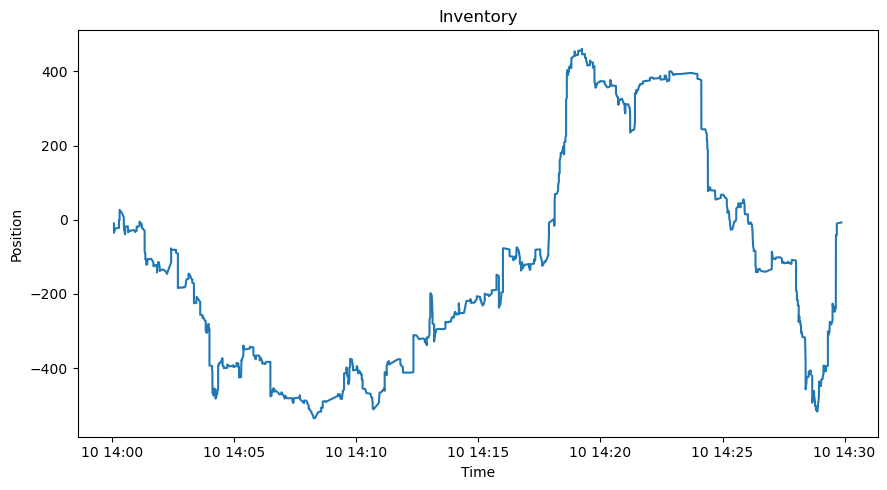

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(9, 5))
df = out_dict['trades']
ax.plot(df['ts'], df['size'].cumsum())
ax.set_title(f"Inventory")
ax.set_xlabel('Time')
ax.set_ylabel('Position')

# Adjust layout
plt.tight_layout()
plt.show()

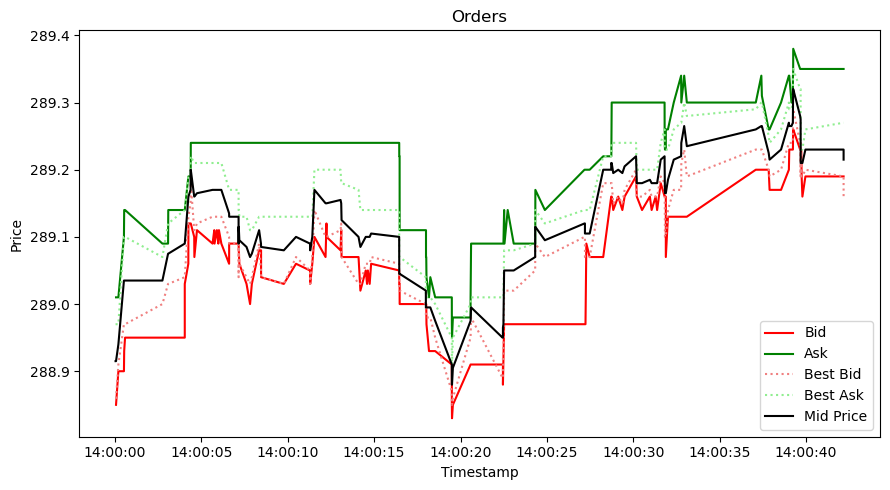

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
df = out_dict['quotes']
df['mid_price'] = (df['best_bid'] + df['best_ask'])/2

df = df.iloc[:300].ffill()
ax.plot(df['ts'], df['bid'], color='red', label='Bid')
ax.plot(df['ts'], df['ask'], color='green', label='Ask')
ax.plot(df['ts'], df['best_bid'], linestyle=':', color='lightcoral', label='Best Bid')
ax.plot(df['ts'], df['best_ask'], linestyle=':', color='lightgreen', label='Best Ask')
ax.plot(df['ts'], df['mid_price'], color='black', label='Mid Price')    
ax.set_title(f"Orders")
ax.set_xlabel('Timestamp')
ax.set_ylabel('Price')
ax.legend()
    
plt.tight_layout()
plt.show()

In [32]:
ts_delta_milli = [0, 1, 2, 3, 4, 5, 10, 20, 50]
returns = []
trade_df = out_dict['trades']
trade_df['ts'] = pd.to_datetime(trade_df['ts'])
trade_df = trade_df.set_index('ts').sort_index()

mid_price_df = data_df[['bid_px_00', 'ask_px_00']].mean(axis=1)
mid_price_df.name = 'mid_price'

for delta in ts_delta_milli:
    trade_df['ts_lag'] = trade_df.index +  pd.Timedelta(milliseconds=delta)
    lag_price = pd.merge_asof(trade_df, mid_price_df, left_on = 'ts_lag', right_index=True, direction='forward')['mid_price']    
    ret = (lag_price - trade_df['price']) / lag_price * 1e4 * np.sign(trade_df['size'])
    returns.append((delta, ret.mean(), ret.std()))

markout_df = pd.DataFrame(returns, columns=['lag', 'return', 'std'])

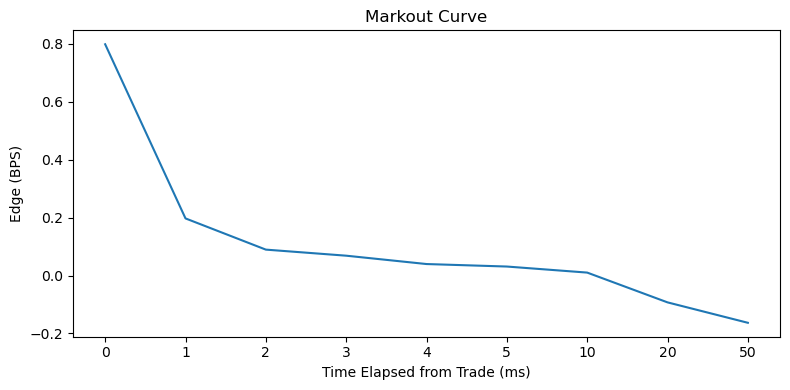

In [33]:
fig, axs = plt.subplots(1, 1, figsize=(8, 4))

axs.set_title(f"Markout Curve")
axs.set_xlabel('Time Elapsed from Trade (ms)')
axs.set_ylabel('Edge (BPS)')
axs.plot(markout_df['lag'].astype(str), markout_df['return'])
fig.tight_layout()